In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit_aer.quantum_info import AerDensityMatrix
from qiskit.circuit.library import QuantumVolume

## 1 quibit circuits

In [2]:
qc = QuantumVolume(1, seed=1111)
%timeit -o DensityMatrix(qc)

135 µs ± 846 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 135 µs ± 846 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [3]:
qc = QuantumVolume(1, seed=1111)
%timeit -o AerDensityMatrix(qc)

69.3 µs ± 467 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 69.3 µs ± 467 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

## 2 quibits circuits

In [4]:
qc = QuantumVolume(2, seed=1111)
%timeit -o DensityMatrix(qc)

650 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 650 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [5]:
qc = QuantumVolume(2, seed=1111)
%timeit -o AerDensityMatrix(qc)

160 µs ± 27.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 160 µs ± 27.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

## More quibits circuits

In [6]:
import sys
import psutil
import numpy as np

mem = psutil.virtual_memory()
# assume 'sys.getsizeof(1j) * 2^(2*n) <= mem.free' is safe
# 32 * 2^(2*n) <= mem.free
max_qubits = int(np.log2(mem.free / sys.getsizeof(1j)) // 2)
print(f'{max_qubits=}')
n_qubits_range = range(1, max_qubits+1)

max_qubits=14


In [ ]:
if False:
    qc = QuantumVolume(13, seed=1111)
    %timeit -n 1 -r 1 DensityMatrix(qc) #=> 7min 7s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

if False:
    qc = QuantumVolume(13, seed=1111)
    %timeit -n 1 -r 1 AerDensityMatrix(qc) #=> 2min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

if False:
    qc = QuantumVolume(14, seed=1111)
    %timeit -n 1 -r 1 DensityMatrix(qc) #=> 36min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

if False:
    qc = QuantumVolume(14, seed=1111)
    %timeit -n 1 -r 1 AerDensityMatrix(qc) #=> 13min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

In [7]:
results_dm = []
results_adm = []

for n_qubits in n_qubits_range:
    qc = QuantumVolume(n_qubits, seed=1111)
    if n_qubits <= 10:
        result = %timeit -o DensityMatrix(qc)
        results_dm.append([result.average, result.stdev])
        result = %timeit -o AerDensityMatrix(qc)
        results_adm.append([result.average, result.stdev])
    else:
        result = %timeit -n 1 -r 1 -o DensityMatrix(qc)
        results_dm.append([result.average, result.stdev])
        result = %timeit -n 1 -r 1 -o AerDensityMatrix(qc)
        results_adm.append([result.average, result.stdev])

135 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
68.1 µs ± 741 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
639 µs ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
148 µs ± 893 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
816 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
179 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.68 ms ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
390 µs ± 5.91 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.93 ms ± 33.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1 ms ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
9.77 ms ± 73.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.45 ms ± 38.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
37.2 ms ± 330 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
24.1 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 

In [8]:
import pickle

with open('results_dm.pkl', 'wb') as fout:
    pickle.dump(results_dm, fout)
with open('results_adm.pkl', 'wb') as fout:
    pickle.dump(results_adm, fout)

In [9]:
import pickle

with open('results_dm.pkl', 'rb') as fin:
    results_dm = pickle.load(fin)
with open('results_adm.pkl', 'rb') as fin:
    results_adm = pickle.load(fin)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

if isinstance(results_dm, list):
    results_dm = np.array(results_dm)
if isinstance(results_adm, list):
    results_adm = np.array(results_adm)

def plot_graph(n=len(results_dm)):
    n_qubits_range = range(1, n+1)
    fig, ax = plt.subplots()
    ax.errorbar(x=n_qubits_range, y=results_dm[:, 0][:n], yerr=results_dm[:, 1][:n], fmt='-o', color='b')
    ax.errorbar(x=n_qubits_range, y=results_adm[:, 0][:n], yerr=results_adm[:, 1][:n], fmt='-o', color='r')
    ax.set_xlabel('num of qubits')
    ax.set_ylabel('elapsed mean/stdev time [s]')
    ax.set_title('Performance comparison between DensityMatrix and AerDensityMatrix')
    ax.legend(['DensityMatrix', 'AerDensityMatrix'])
    plt.grid()
    plt.show()

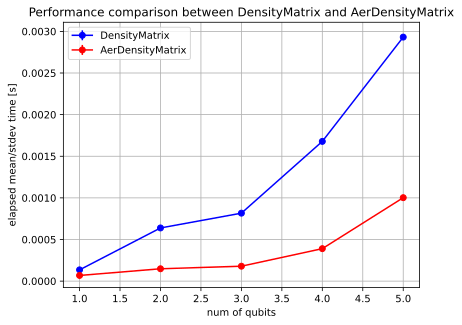

In [18]:
plot_graph(5)

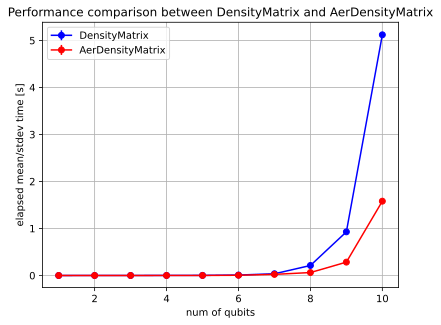

In [19]:
plot_graph(10)

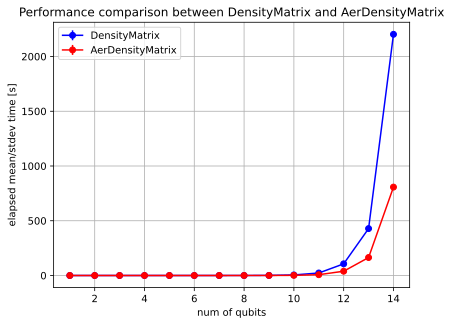

In [20]:
plot_graph()